### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='dark',rc={'figure.figsize':(20,10)})

### Importing dataset 

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Sales\Sales.csv',index_col=0,header=0,encoding= 'unicode_escape')
df.head().style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
User_ID,,,,,,,,,,,,,
1002903,Sanskriti,P00125942,M,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000,nan,nan
1000732,Kartik,P00110942,M,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.000000,nan,nan
1001990,Bindu,P00118542,M,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.000000,nan,nan
1001425,Sudevi,P00237842,F,16,0,Karnataka,Southern,Construction,Auto,2,23912.000000,nan,nan
1000588,Joni,P00057942,F,28,1,Gujarat,Western,Food Processing,Auto,2,23877.000000,nan,nan


### Checking shape of dataset

In [3]:
df.shape

(11251, 13)

### Checking columns in dataset

In [4]:
df.columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount', 'Status',
       'unnamed1'],
      dtype='object')

### Checking details of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11251 entries, 1002903 to 1002744
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cust_name         11251 non-null  object 
 1   Product_ID        11251 non-null  object 
 2   Gender            11251 non-null  object 
 3   Age               11251 non-null  int64  
 4   Marital_Status    11251 non-null  int64  
 5   State             11251 non-null  object 
 6   Zone              11251 non-null  object 
 7   Occupation        11251 non-null  object 
 8   Product_Category  11251 non-null  object 
 9   Orders            11251 non-null  int64  
 10  Amount            11239 non-null  float64
 11  Status            0 non-null      float64
 12  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1.2+ MB


### Dropping unnecessary columns

In [6]:
df = df.drop(columns=['Status','unnamed1'])
df.head().style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
User_ID,,,,,,,,,,,
1002903,Sanskriti,P00125942,M,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000
1000732,Kartik,P00110942,M,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.000000
1001990,Bindu,P00118542,M,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.000000
1001425,Sudevi,P00237842,F,16,0,Karnataka,Southern,Construction,Auto,2,23912.000000
1000588,Joni,P00057942,F,28,1,Gujarat,Western,Food Processing,Auto,2,23877.000000


### Getting statistical insights of data

In [7]:
df.describe().style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,Age,Marital_Status,Orders,Amount
count,11251.000000,11251.000000,11251.000000,11239.000000
mean,35.421207,0.420318,2.489290,9453.610858
std,12.754122,0.493632,1.115047,5222.355869
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,1.500000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12675.000000
max,92.000000,1.000000,4.000000,23952.000000


### Checking for null values

In [8]:
df.isnull().sum()

Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

### Boxplot to check outliers

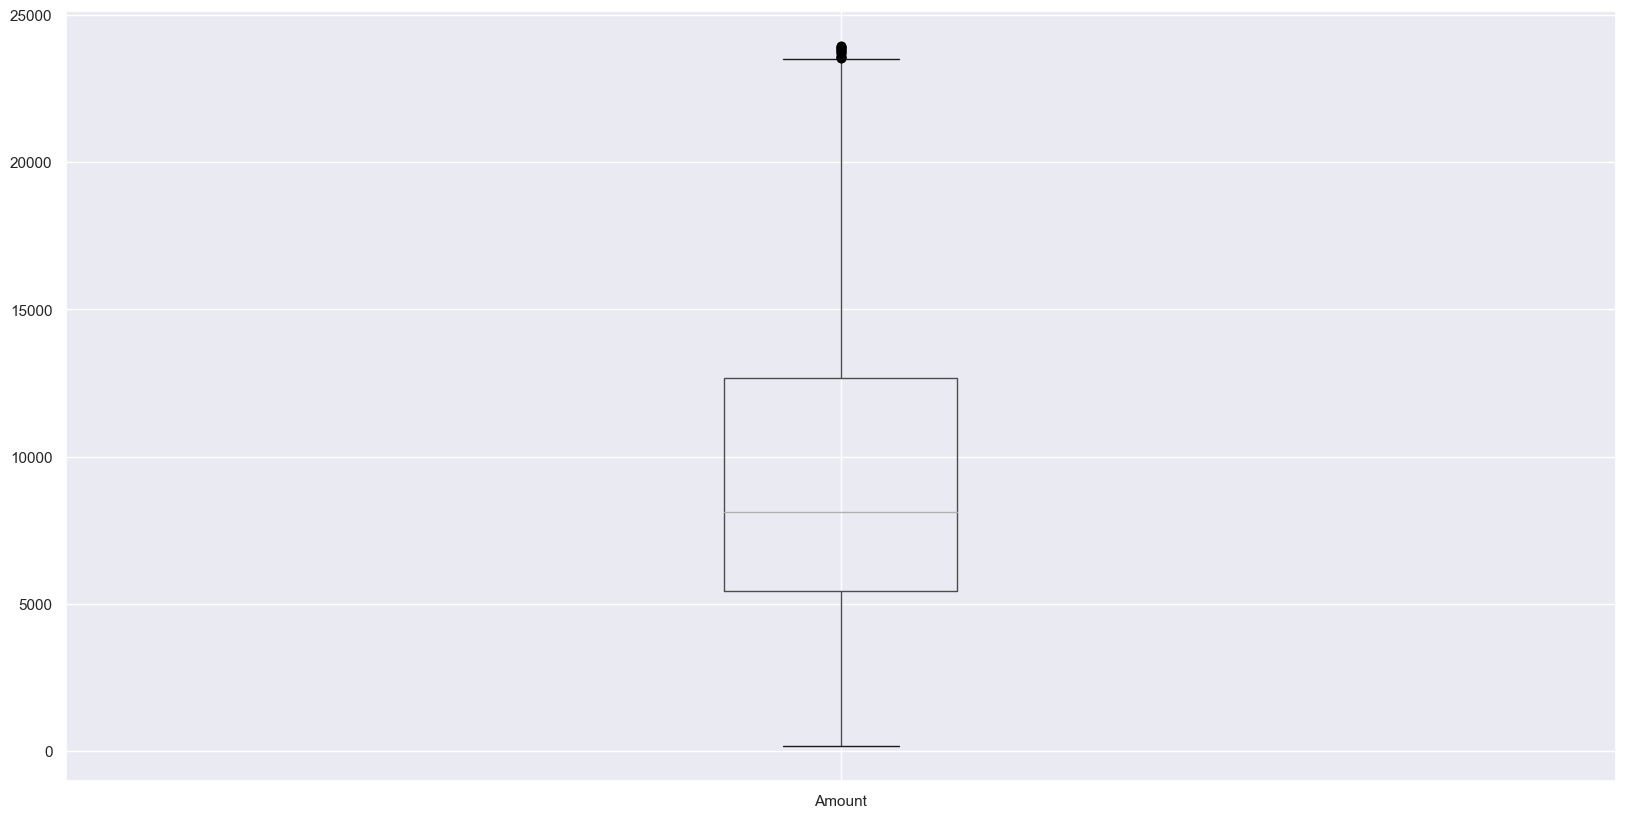

In [9]:
df.boxplot(column = 'Amount')
plt.show()

In [10]:
amount_mean = df['Amount'].mean()
amount_median = df['Amount'].median()
amount_mode = df['Amount'].mode()[0]
print('Mean:',amount_mean)
print('Median:',amount_median)
print('Mode:',amount_mode)

Mean: 9453.610857727557
Median: 8109.0
Mode: 7907.0


### Filling na with mean

In [11]:
df['Amount'].fillna(amount_mean, inplace=True)
df.isnull().sum()

Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### Creating category of ages using binning

In [12]:
CustomersAge = df['Age']
bins = [CustomersAge.min(),15,21,60,CustomersAge.max()]
binlabels = ['Children', 'Adolescents', 'Adult', 'Senior']

categories = pd.cut(CustomersAge,bins,labels = binlabels)
categories.head(20)

User_ID
1002903          Adult
1000732          Adult
1001990          Adult
1001425    Adolescents
1000588          Adult
1000588          Adult
1001132          Adult
1002092         Senior
1003224          Adult
1003650          Adult
1003829          Adult
1000214    Adolescents
1004035    Adolescents
1001680          Adult
1003858          Adult
1000813          Adult
1005447          Adult
1001193          Adult
1001883          Adult
1001883          Adult
Name: Age, dtype: category
Categories (4, object): ['Children' < 'Adolescents' < 'Adult' < 'Senior']

In [13]:
df['Labelled_Age'] = categories
a = df.tail()
a.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Labelled_Age
User_ID,,,,,,,,,,,,
1000695,Manning,P00296942,F,19,1,Maharashtra,Western,Chemical,Office,4,370.000000,Adolescents
1004089,Reichenbach,P00171342,F,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.000000,Adult
1001209,Oshin,P00201342,M,40,0,Madhya Pradesh,Central,Textile,Office,4,213.000000,Adult
1004023,Noonan,P00059442,F,37,0,Karnataka,Southern,Agriculture,Office,3,206.000000,Adult
1002744,Brumley,P00281742,M,19,0,Maharashtra,Western,Healthcare,Office,3,188.000000,Adolescents


In [14]:
print(df['Labelled_Age'].isna().sum())
print(df.shape)

51
(11251, 12)


### Dropping NA values

In [15]:
df = df.dropna(how='any',subset=['Labelled_Age'])
print(df['Labelled_Age'].isna().sum())
print(df.shape)

0
(11200, 12)


### Checking percentage of customers of different age groups

In [16]:
df['Labelled_Age'].value_counts(normalize = True)*100

Adult          85.982143
Adolescents     9.428571
Senior          3.357143
Children        1.232143
Name: Labelled_Age, dtype: float64

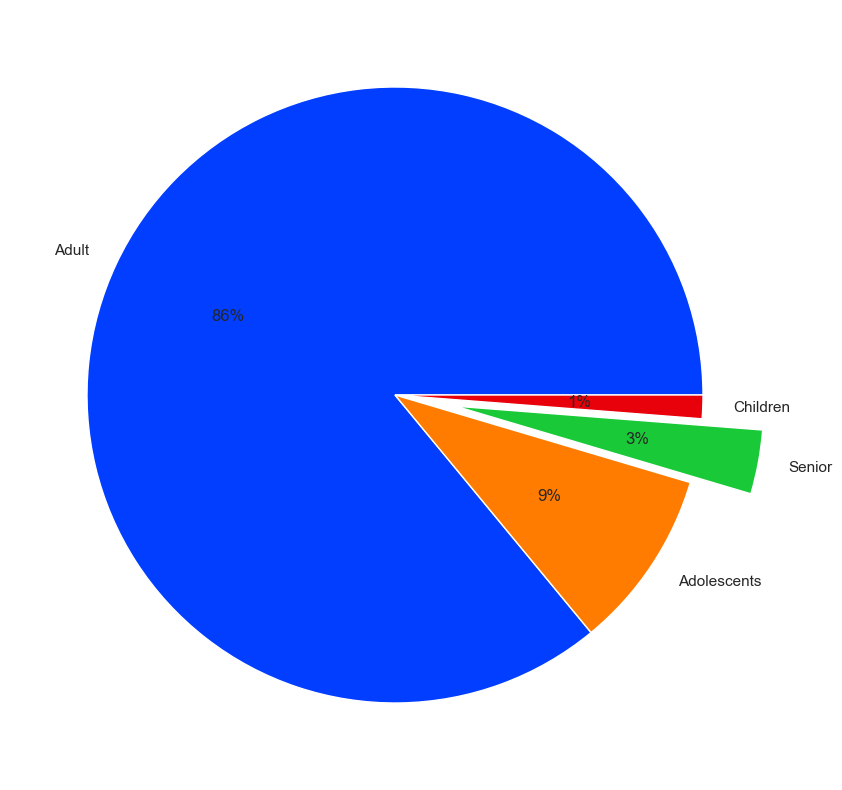

In [17]:
# Pie Diagram Representation
data = df['Labelled_Age'].value_counts(normalize = True)*100 
keys = ['Adult', 'Adolescents', 'Senior', 'Children']

explode = [0, 0, 0.2, 0] 
palette_color = sns.color_palette("bright") 
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%') 
plt.savefig('test1.png')
plt.show()

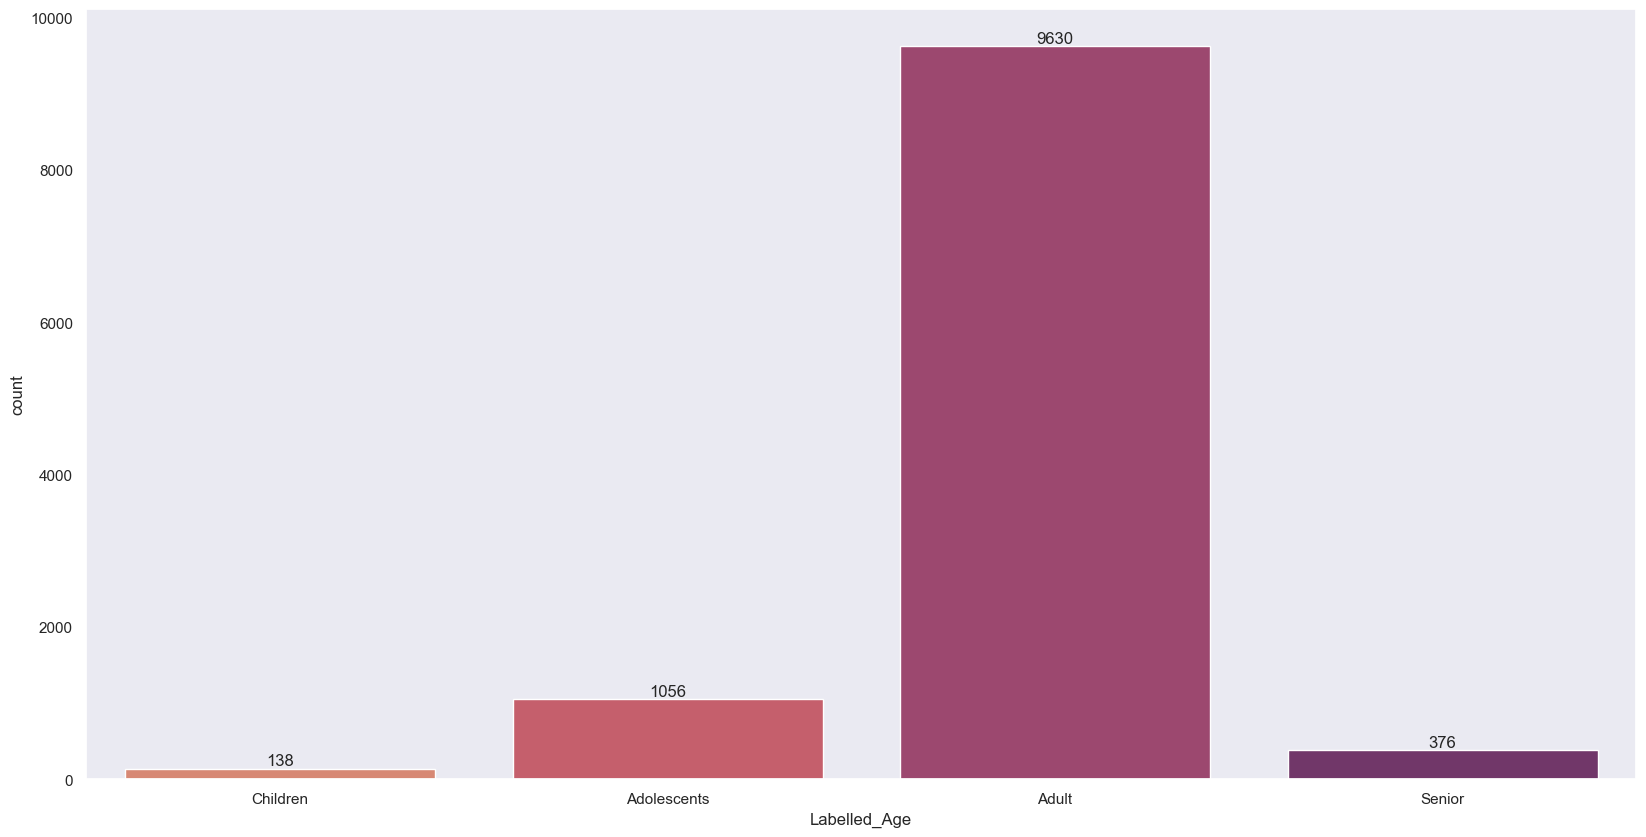

In [18]:
# Count of customers by labelled_age
ax = sns.countplot(data=df,x='Labelled_Age',palette='flare')
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig('test2.png')
plt.show()

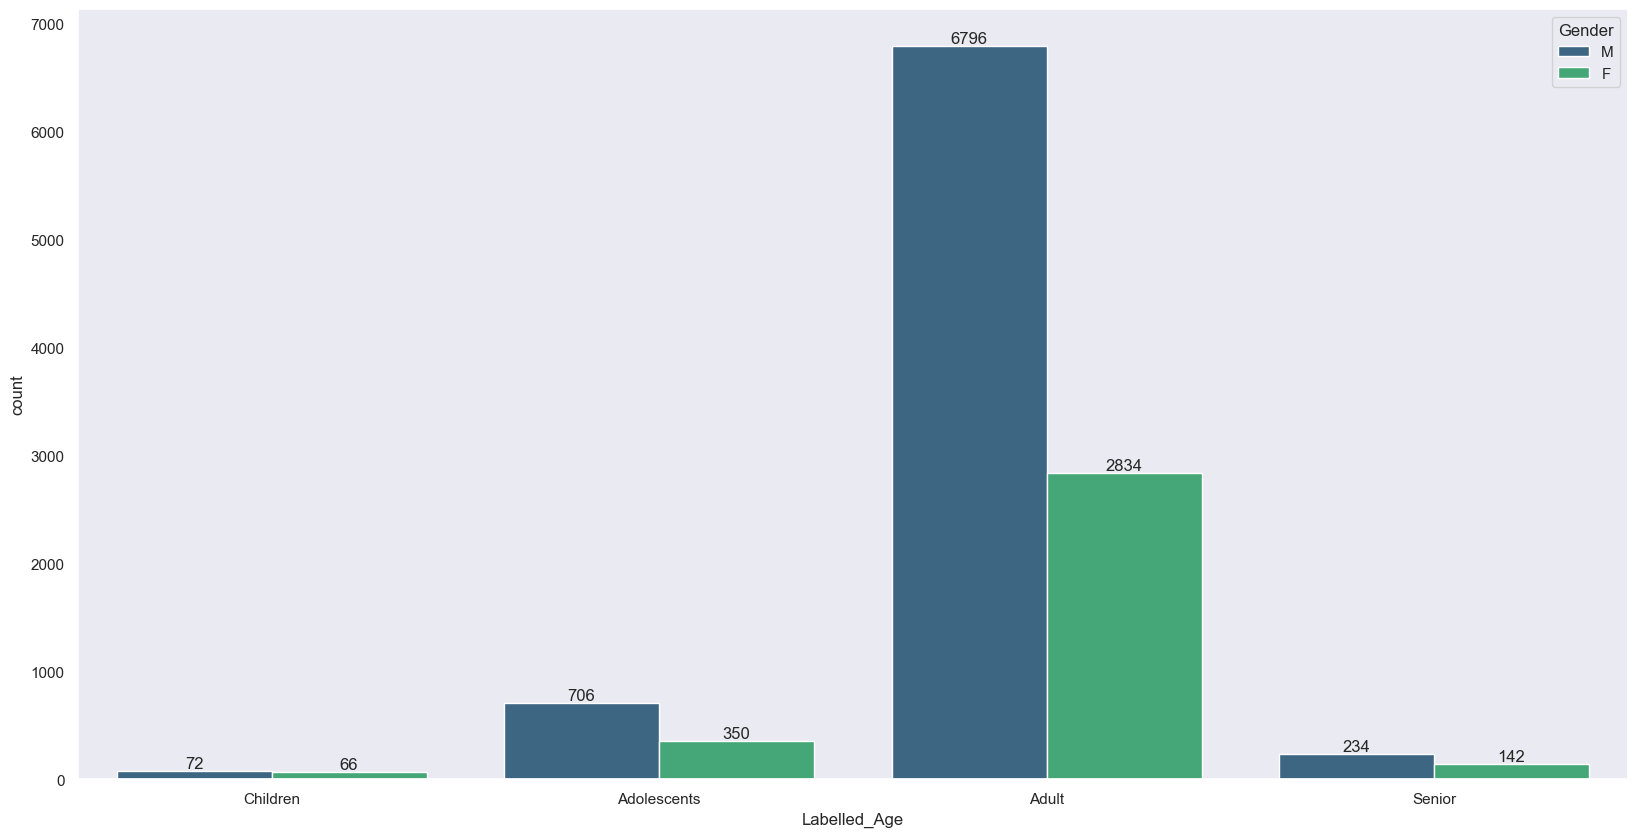

In [19]:
# Count of customers by labelled_age and sroting by gender
ax = sns.countplot(data=df,x='Labelled_Age',palette='viridis',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig('test8.png')
plt.show()

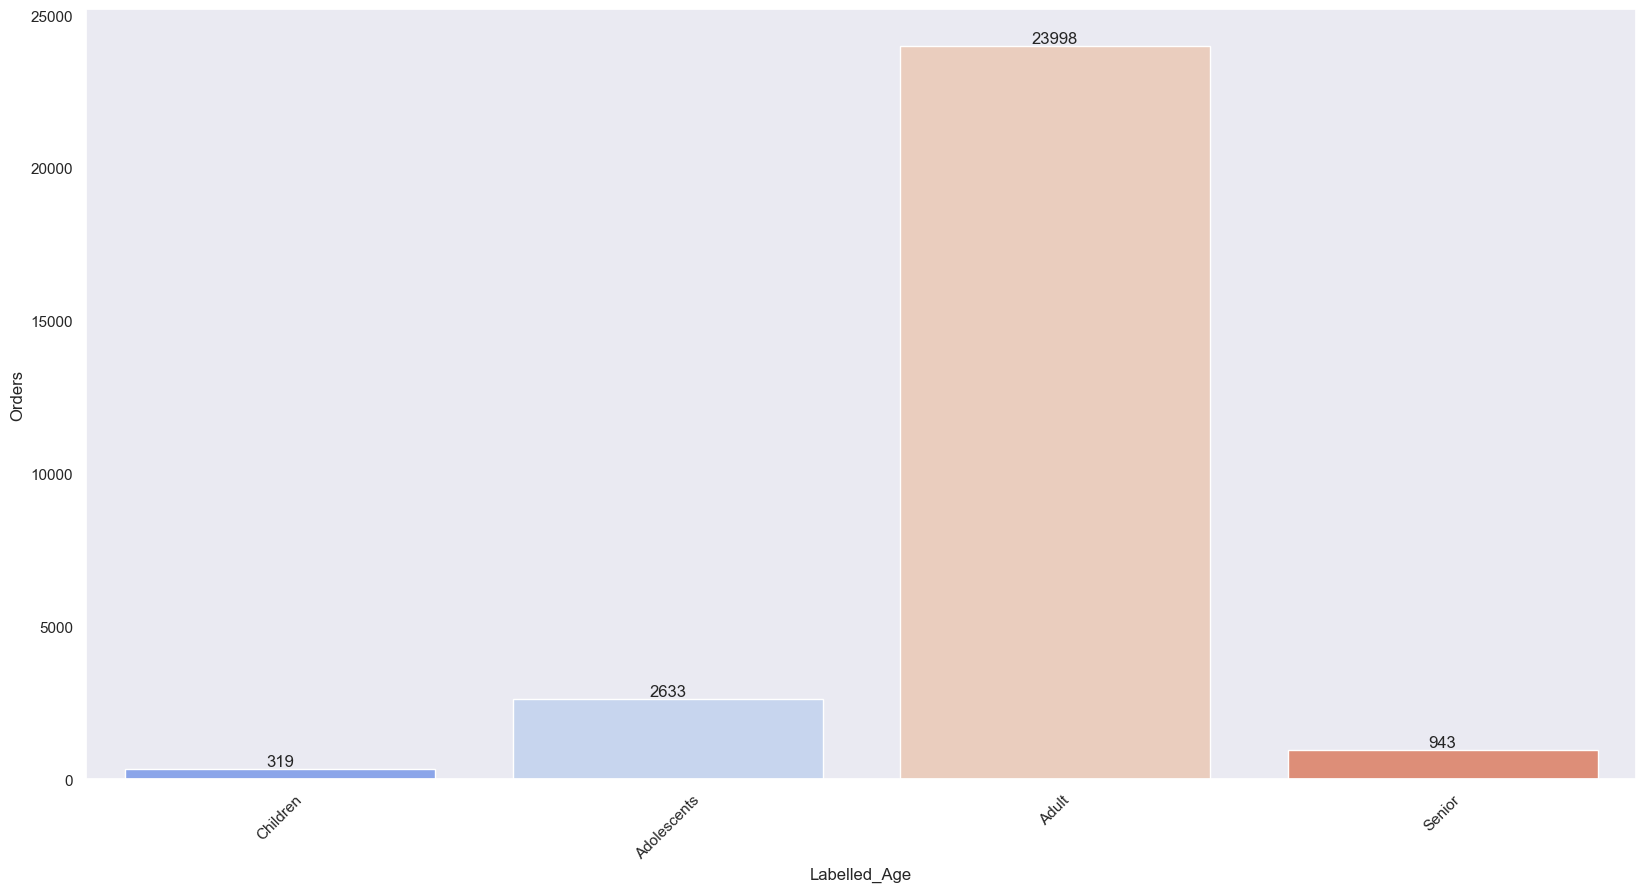

In [20]:
# Age group vs order
age_sales = df.groupby(['Labelled_Age'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = True)

ax = sns.barplot(data = age_sales, x = 'Labelled_Age', y = 'Orders', palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation = 45)
plt.show()

### Checking number of Males vs Females 

In [21]:
df['Gender'].value_counts()

M    7808
F    3392
Name: Gender, dtype: int64

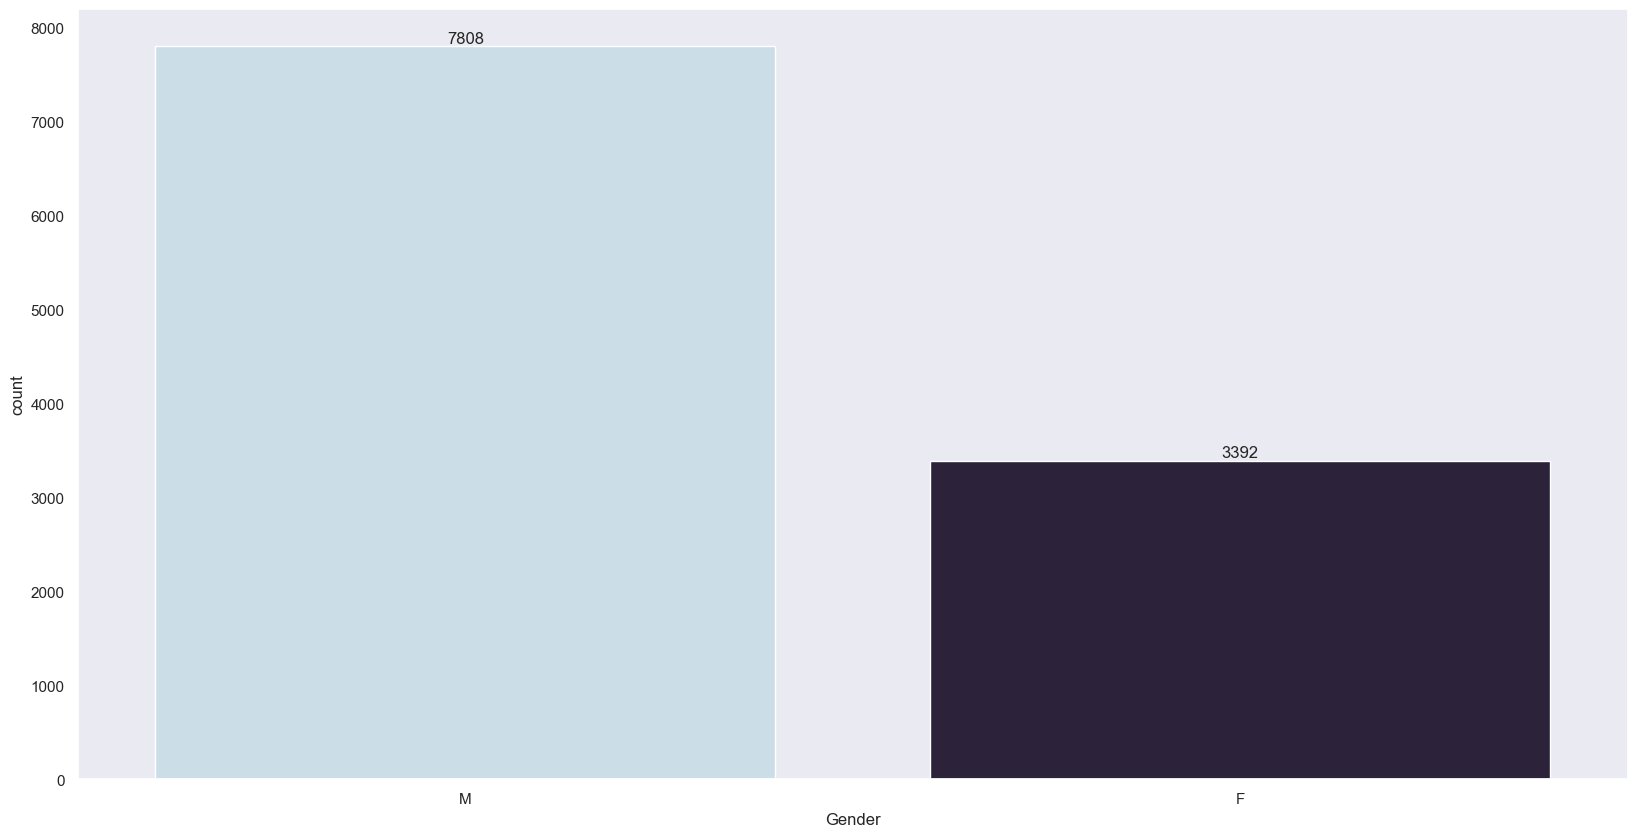

In [22]:
# Count of customers by gender
ax = sns.countplot(data=df,x='Gender',palette='ch:s=.25,rot=-.25')
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig('test3.png')
plt.show()

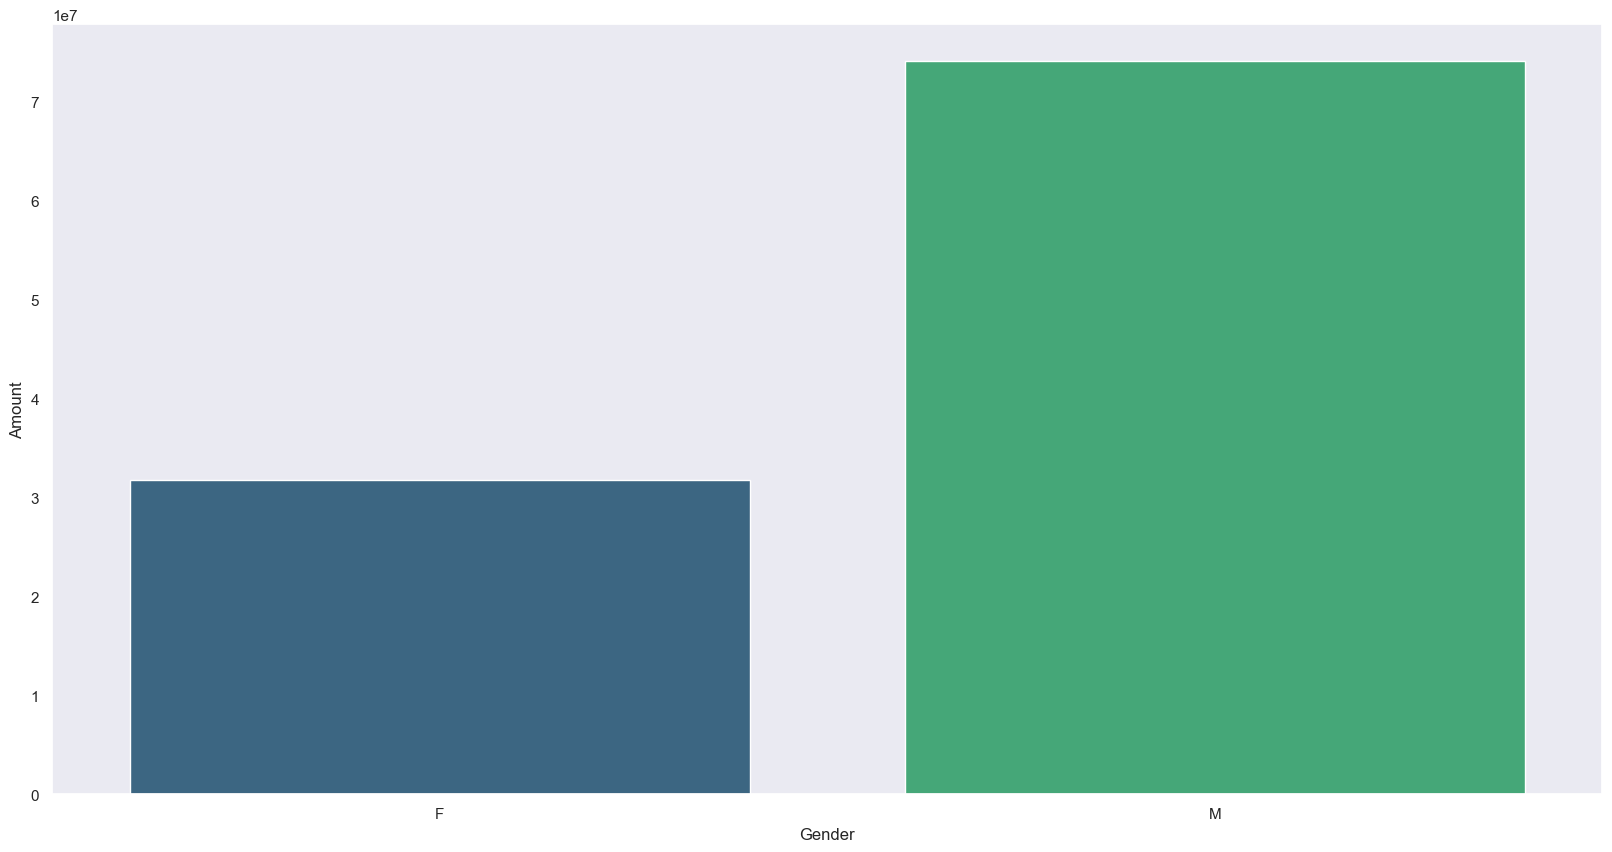

In [23]:
# Gender vs Amount
gender_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = True)

ax = sns.barplot(data=gender_amount,x='Gender',y='Amount',palette='viridis')
plt.savefig('test6.png')
plt.show()

### Checking number of orders

In [24]:
df['Orders'].value_counts()

2    2880
1    2797
4    2767
3    2756
Name: Orders, dtype: int64

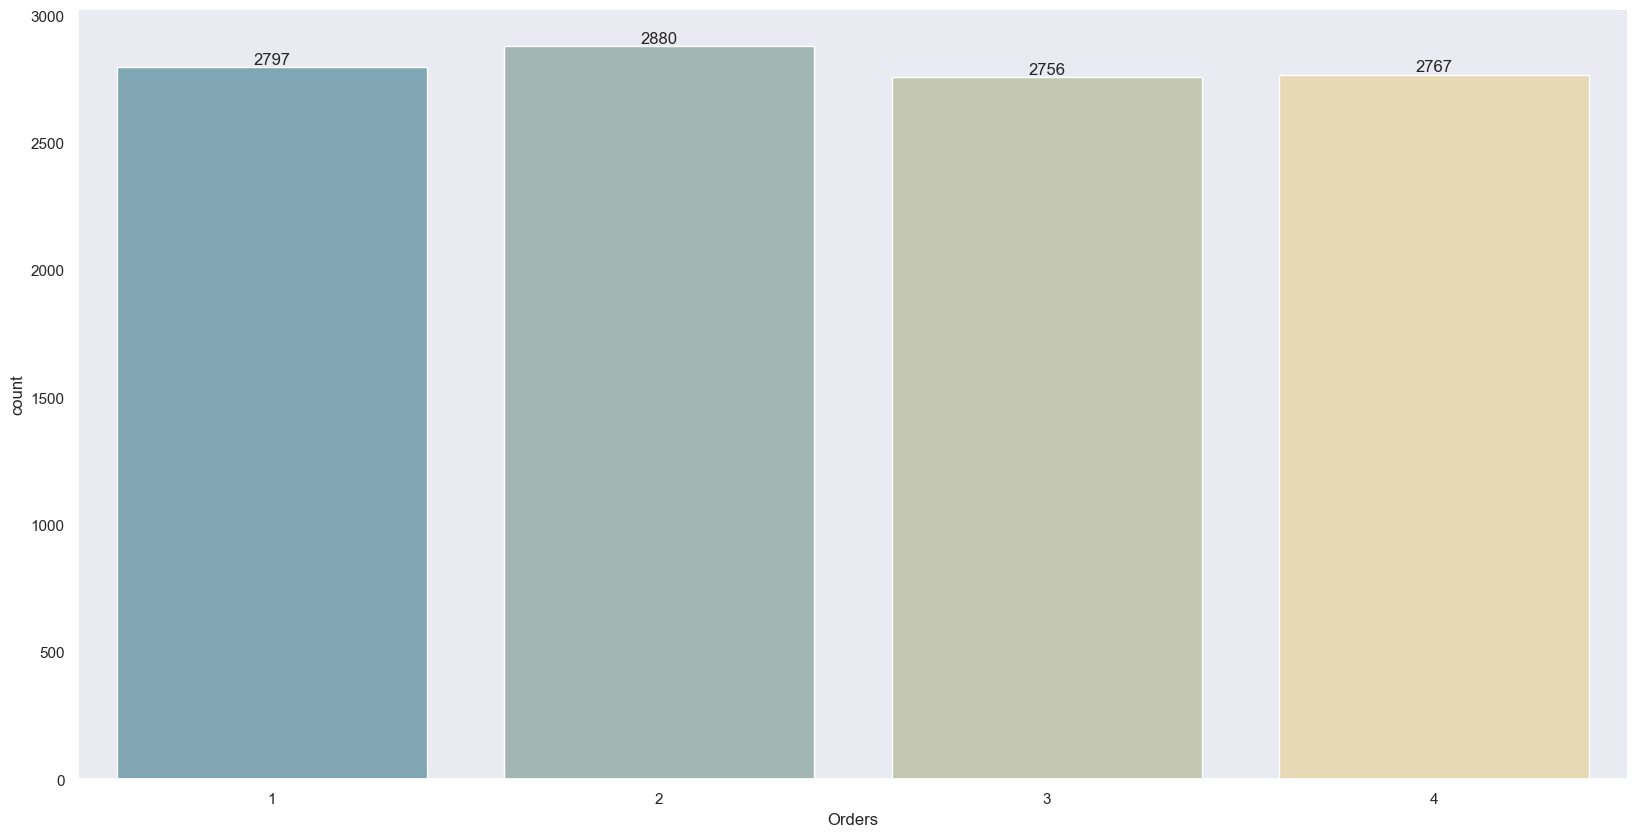

In [25]:
# Count of customers by orders
ax = sns.countplot(data=df,x='Orders',palette='blend:#7AB,#EDA')
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig('test4.png')
plt.show()

### Checking percentage of customers who are married

In [26]:
df['Marital_Status'].value_counts(normalize = True)*100

0    57.928571
1    42.071429
Name: Marital_Status, dtype: float64

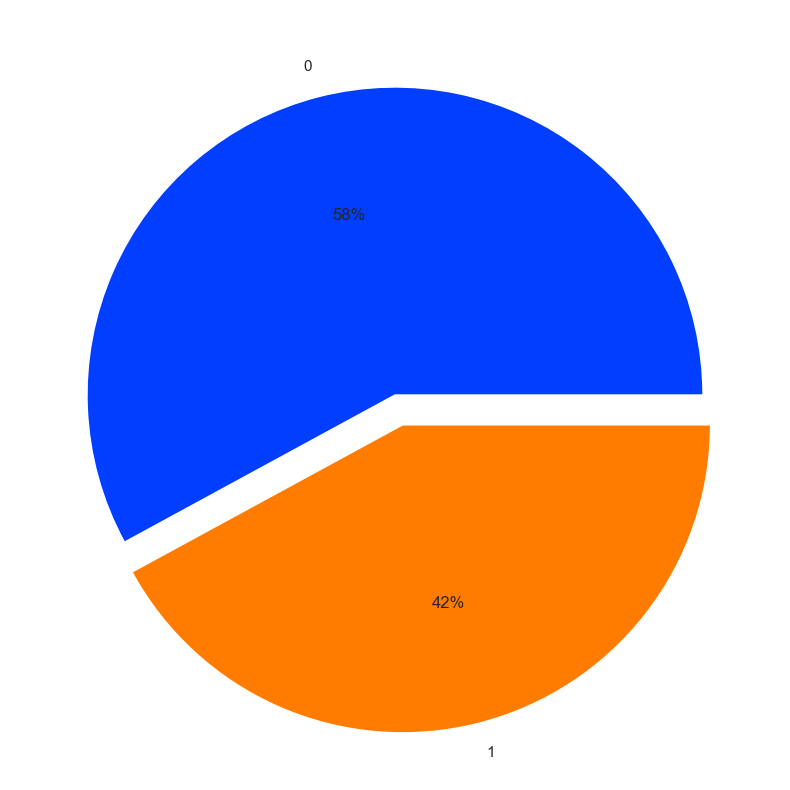

In [27]:
# Pie Diagram
data = df['Marital_Status'].value_counts(normalize = True)*100
keys = [0,1]

explode = [0, 0.1] 
palette_color = sns.color_palette("bright")  
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%') 
plt.show()

### Checking number of unique Occupation with values counts

In [28]:
df['Occupation'].value_counts()

IT Sector          1580
Healthcare         1397
Aviation           1304
Banking            1134
Govt                851
Hospitality         703
Media               632
Automobile          565
Chemical            541
Lawyer              527
Retail              498
Food Processing     423
Construction        414
Textile             349
Agriculture         282
Name: Occupation, dtype: int64

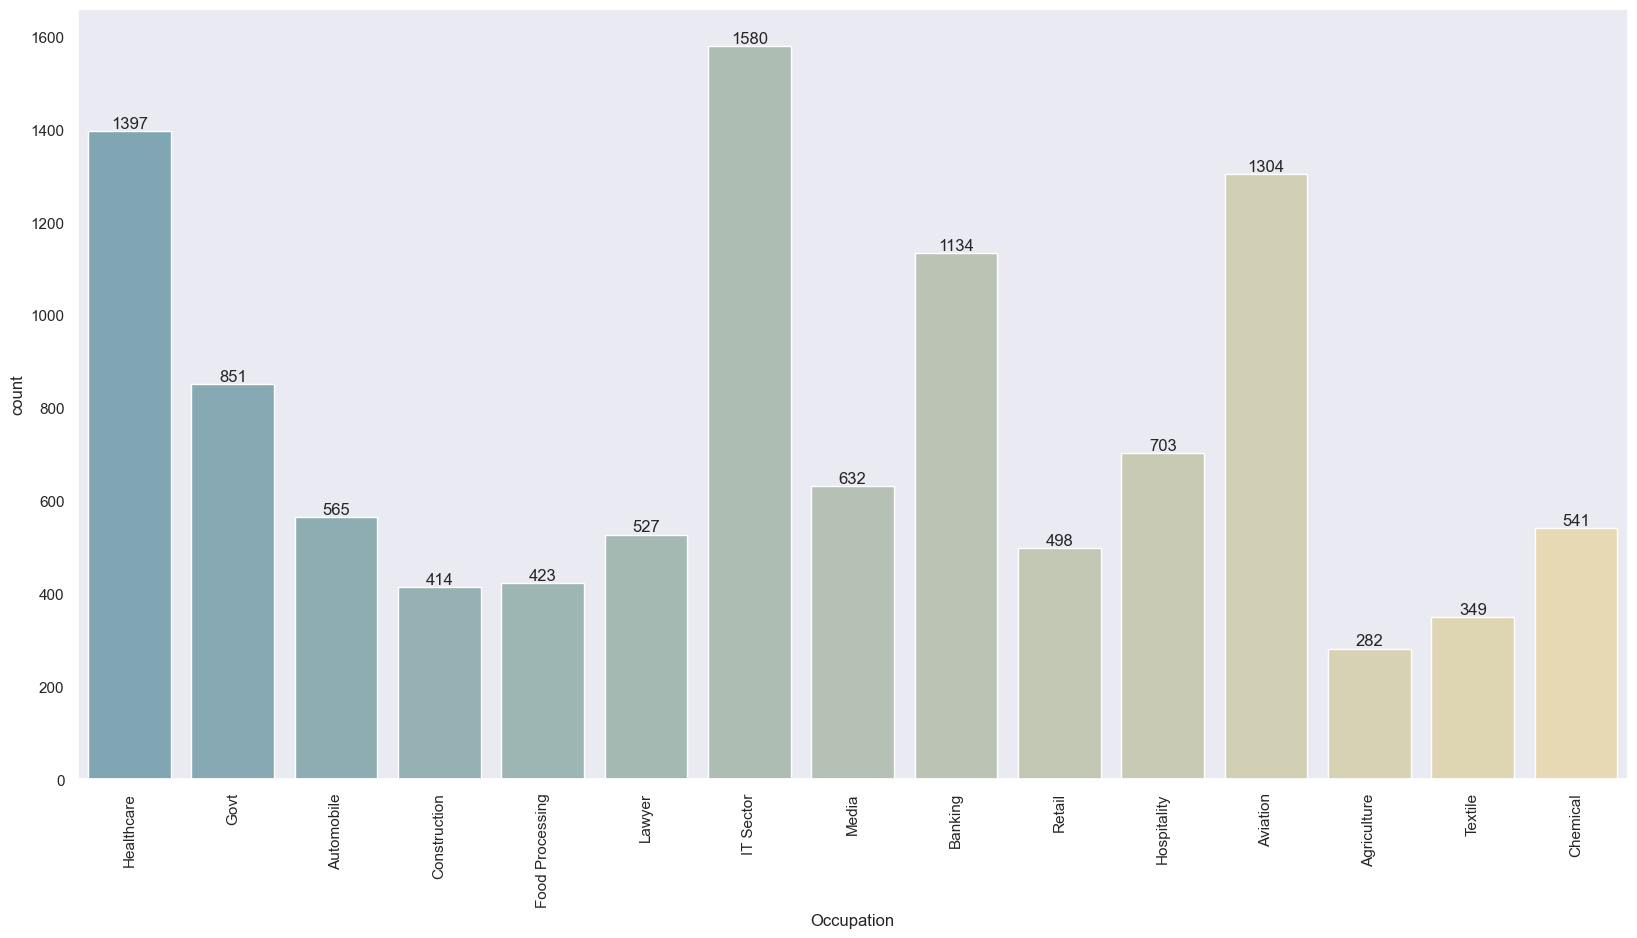

In [29]:
# Count of customers by Occupation
ax = sns.countplot(data=df,x='Occupation',palette='blend:#7AB,#EDA')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig('test5.png')
plt.show()

### Getting results of customers who works in IT Sector  

In [30]:
IT = df[df['Occupation'] == 'IT Sector']
IT.head().style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Labelled_Age
User_ID,,,,,,,,,,,,
1002092,Shivangi,P00273442,M,61,0,Maharashtra,Western,IT Sector,Auto,1,9453.610858,Senior
1004035,Elijah,P00080342,M,20,1,Andhra Pradesh,Southern,IT Sector,Auto,2,23730.000000,Adolescents
1005447,Amy,P00275642,M,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,9453.610858,Adult
1005256,Grant,P00101742,M,30,0,Andhra Pradesh,Southern,IT Sector,Auto,1,23518.000000,Adult
1005908,Eric,P00282642,M,33,0,Andhra Pradesh,Southern,IT Sector,Auto,3,23462.000000,Adult


### Checking number of unique States with values counts

In [31]:
df['State'].value_counts()

Uttar Pradesh       1939
Maharashtra         1516
Karnataka           1302
Delhi               1105
Madhya Pradesh       920
Andhra Pradesh       808
Himachal Pradesh     603
Kerala               452
Haryana              448
Bihar                431
Gujarat              426
Jharkhand            378
Uttarakhand          319
Rajasthan            229
Punjab               199
Telangana            125
Name: State, dtype: int64

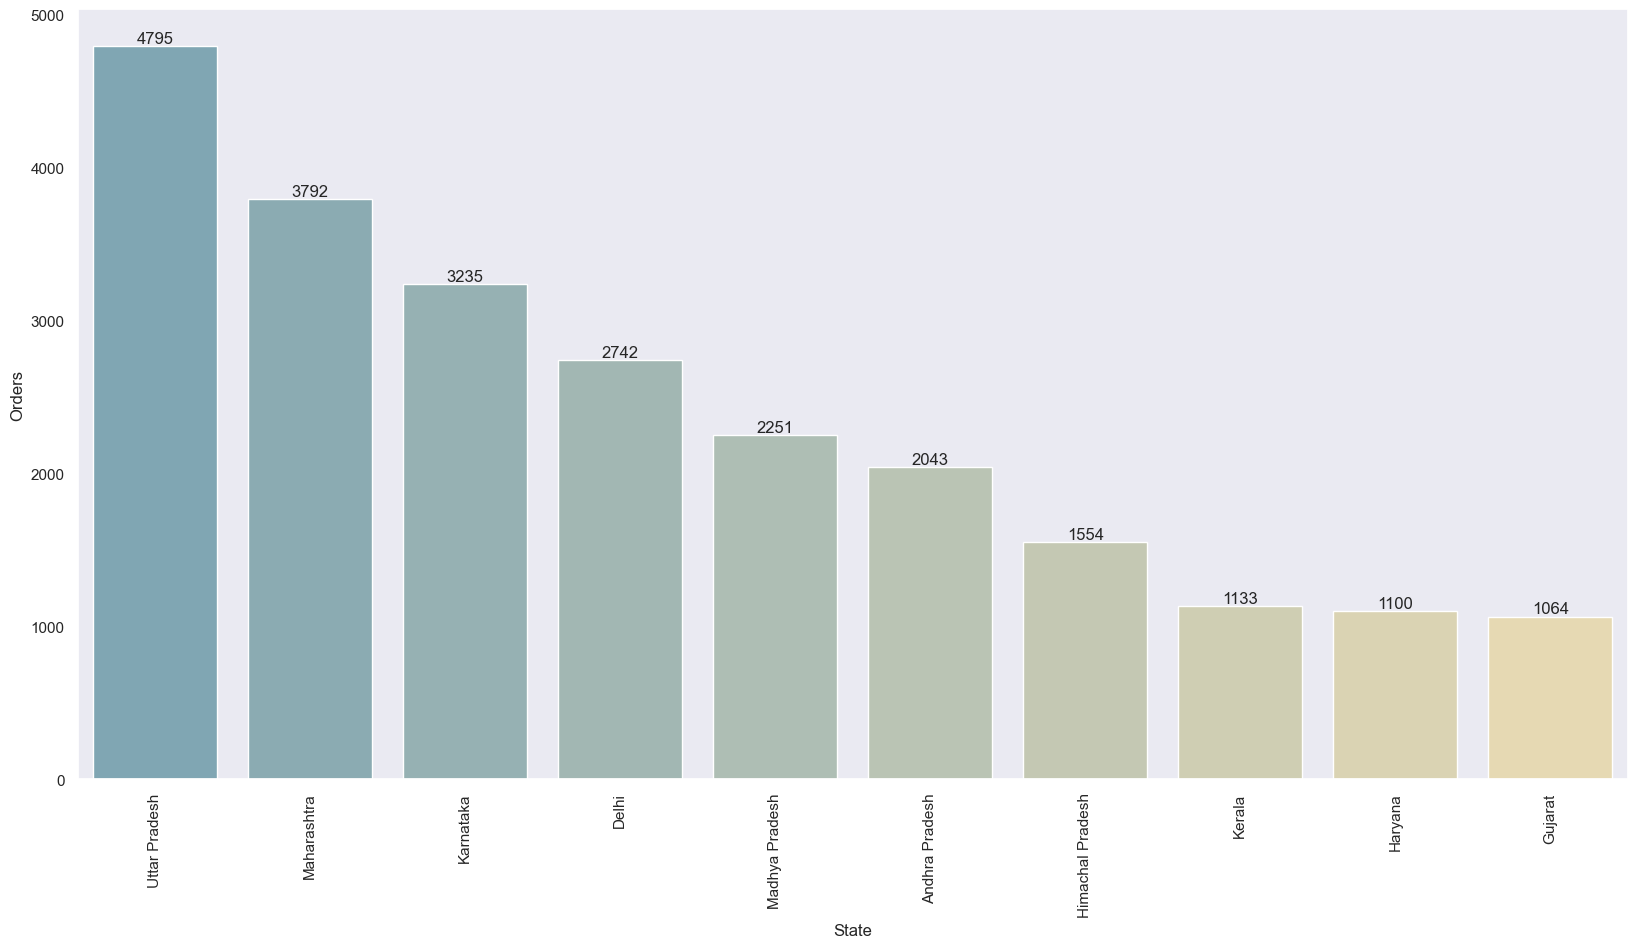

In [32]:
# States vs Orders
State_sales = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by=['Orders'], ascending=False).head(10)

ax = sns.barplot(data=State_sales,x='State',y='Orders',palette='blend:#7AB,#EDA')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig('test6.png')
plt.show()

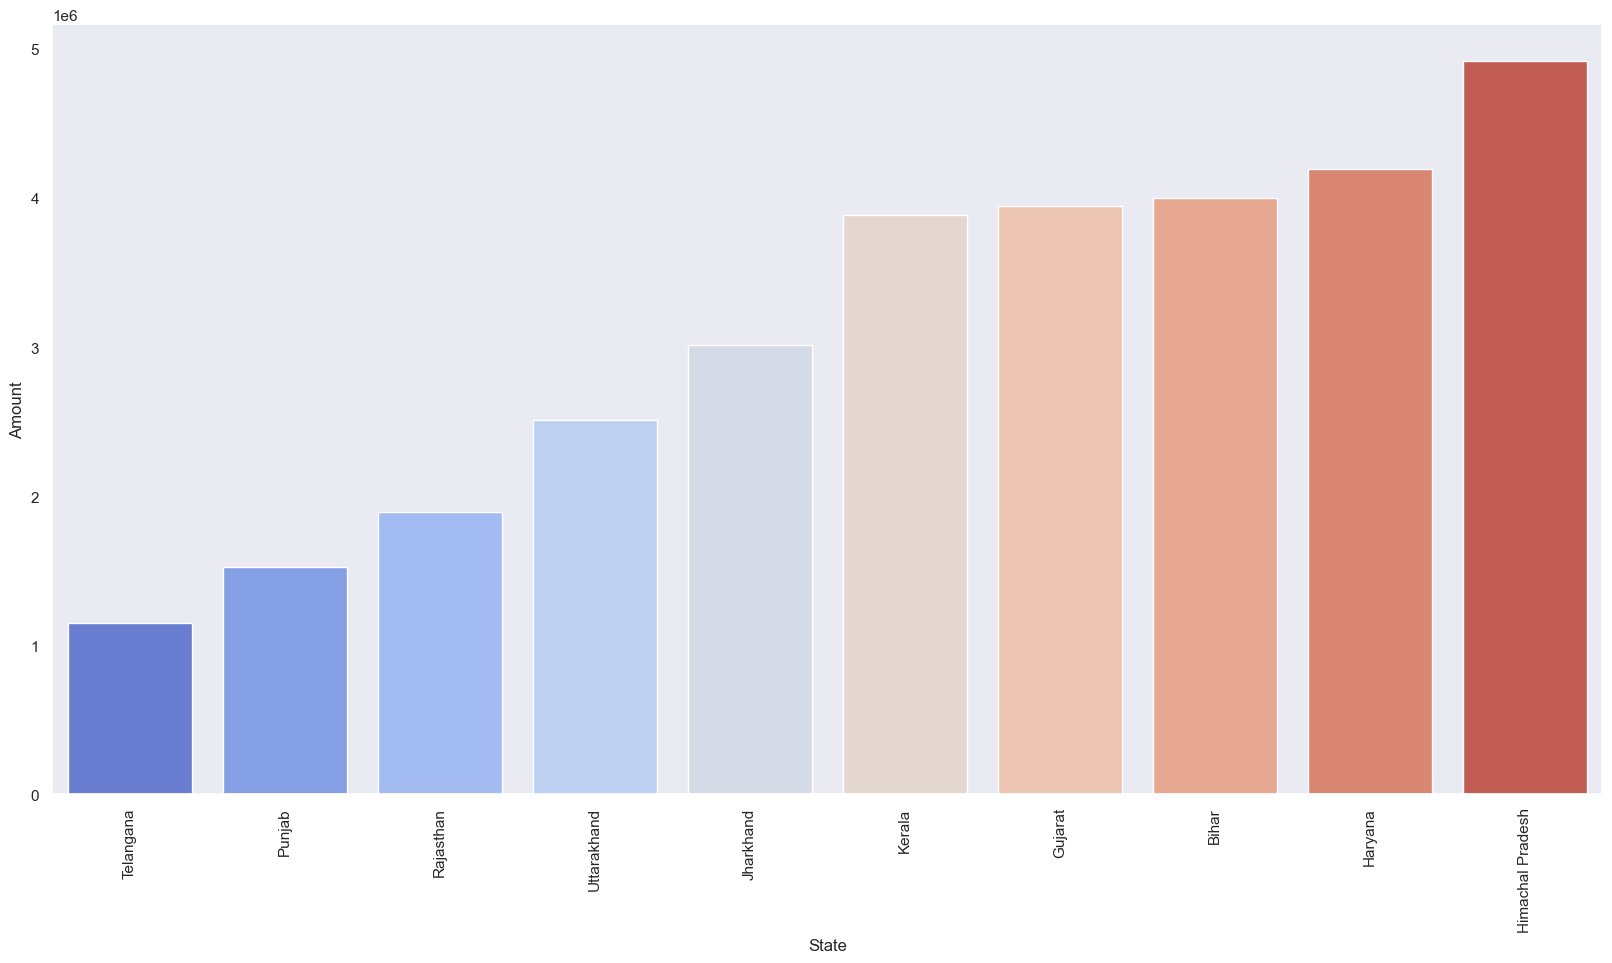

In [33]:
# States vs Amount
State_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by=['Amount'], ascending=True).head(10)

ax = sns.barplot(data=State_amount,x='State',y='Amount',palette='coolwarm')
plt.xticks(rotation=90)
plt.savefig('test9.png')
plt.show()

### Getting results of customers lives in Maharashtra

In [34]:
maharashtra = df[df['State'] == 'Maharashtra']
maharashtra.head().style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Labelled_Age
User_ID,,,,,,,,,,,,
1002903,Sanskriti,P00125942,M,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000,Adult
1002092,Shivangi,P00273442,M,61,0,Maharashtra,Western,IT Sector,Auto,1,9453.610858,Senior
1002638,Damala,P00346242,M,35,1,Maharashtra,Western,Media,Auto,2,23306.000000,Adult
1000379,Thais,P00121642,F,39,0,Maharashtra,Western,Healthcare,Stationery,3,21397.000000,Adult
1001687,Bruce,P00265242,M,33,0,Maharashtra,Western,Govt,Stationery,4,21325.000000,Adult


### Getting results of customers from Maharashtra and gender should be Male whose age is greater then 22 and are from IT Sector

In [35]:
mahmaleit = df[(df['State'] == 'Maharashtra')&(df['Gender'] == 'M')&(df['Occupation'] == 'IT Sector')&(df['Age'] >= 22)]
mahmaleit.head().style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Labelled_Age
User_ID,,,,,,,,,,,,
1002092,Shivangi,P00273442,M,61,0,Maharashtra,Western,IT Sector,Auto,1,9453.610858,Senior
1003401,Ameesha,P00120342,M,39,0,Maharashtra,Western,IT Sector,Footwear & Shoes,2,20602.000000,Adult
1004362,Prichep,P00057542,M,28,1,Maharashtra,Western,IT Sector,Food,3,19515.000000,Adult
1003487,Jesus,P00220342,M,22,0,Maharashtra,Western,IT Sector,Food,4,19474.000000,Adult
1004227,William,P00089442,M,26,0,Maharashtra,Western,IT Sector,Food,3,19462.000000,Adult


In [36]:
print(mahmaleit.shape)

(136, 12)


In [37]:
Age_gender = pd.crosstab(df['Labelled_Age'],df['Gender'], margins=True, margins_name='Total')
Age_gender.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

Gender,F,M,Total
Labelled_Age,,,
Children,66,72,138
Adolescents,350,706,1056
Adult,2834,6796,9630
Senior,142,234,376
Total,3392,7808,11200


In [38]:
State_age = pd.crosstab(df['Labelled_Age'],df['State'], margins=True, margins_name='Total')
State_age.T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

Labelled_Age,Children,Adolescents,Adult,Senior,Total
State,,,,,
Andhra Pradesh,4,86,688,30,808
Bihar,5,42,369,15,431
Delhi,11,81,988,25,1105
Gujarat,8,34,366,18,426
Haryana,6,47,382,13,448
Himachal Pradesh,4,47,534,18,603
Jharkhand,4,32,331,11,378
Karnataka,12,115,1147,28,1302
Kerala,11,50,367,24,452


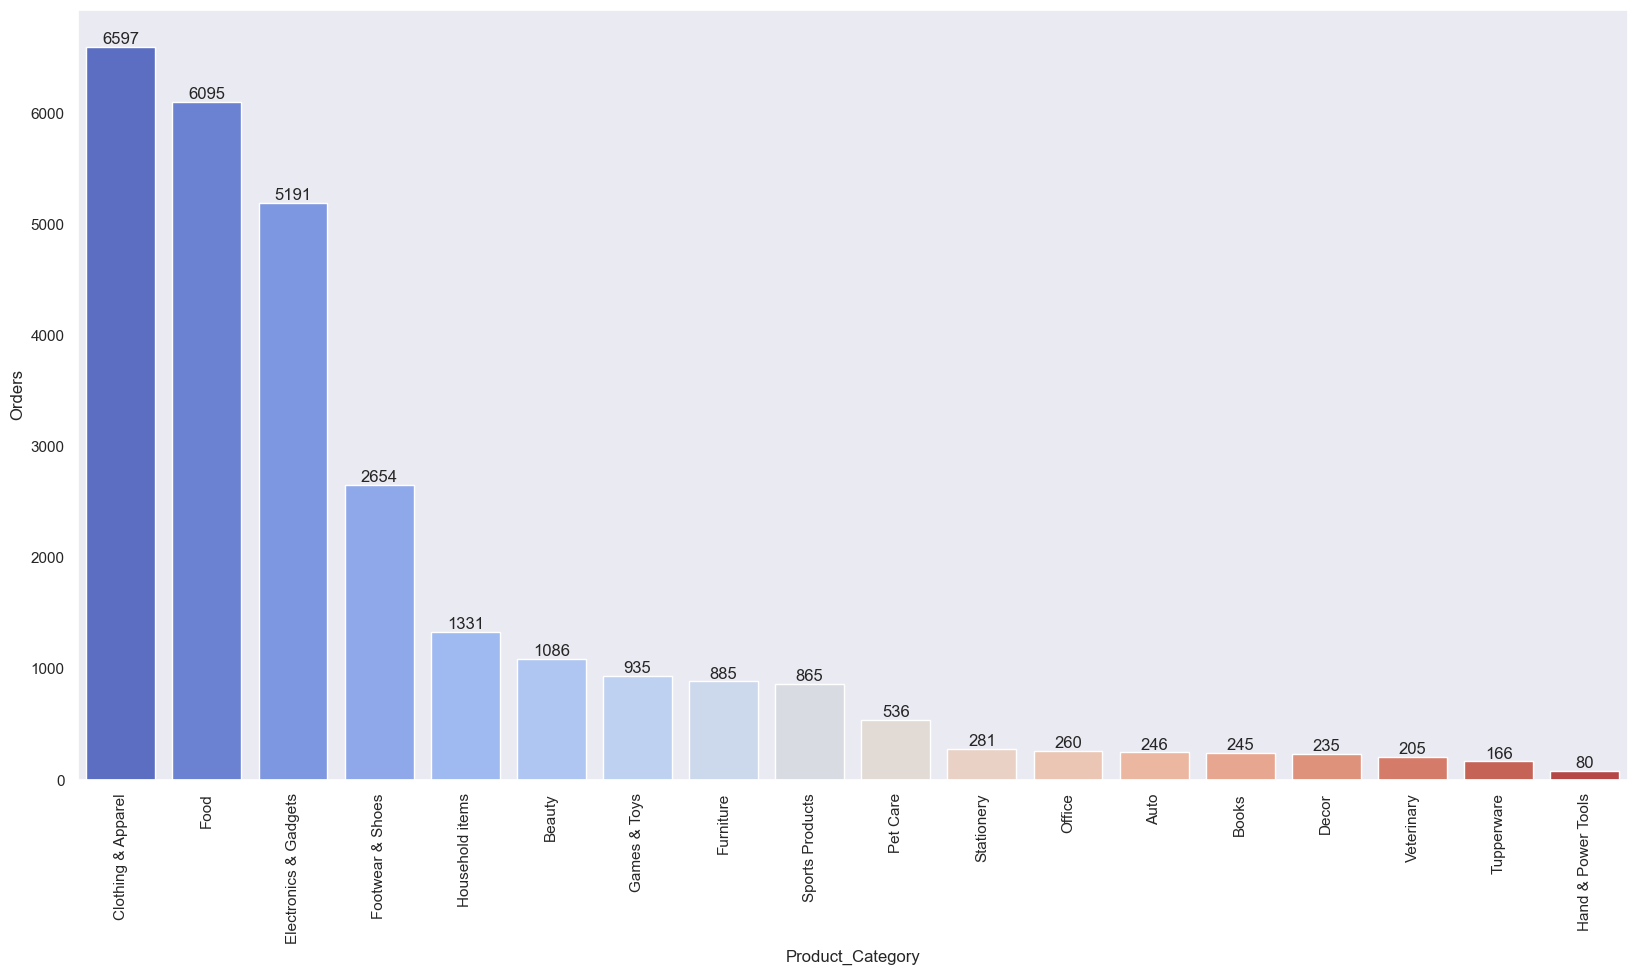

In [39]:
# Product_Category vs Orders
Sales_occupation = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

ax = sns.barplot(data=Sales_occupation, x='Product_Category', y='Orders', palette='coolwarm' )
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig('test11.png')
plt.show()